In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [73]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
train = pd.read_csv('./sign_mnist_train.csv')
test = pd.read_csv('./sign_mnist_test.csv')
combined_dataset = pd.concat([train, test], ignore_index=True)

In [4]:
print(combined_dataset.head())
combined_dataset.shape

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

(34627, 785)

In [5]:
labels = combined_dataset['label'].values
unique_val = np.array(labels)
print("Classes: ",np.unique(unique_val))

Classes:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [6]:
Classes = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    10: "K",
    11: "L",
    12: "M",
    13: "N",
    14: "O",
    15: "P",
    16: "Q",
    17: "R",
    18: "S",
    19: "T",
    20: "U",
    21: "V",
    22: "W",
    23: "X",
    24: "Y",
}


In [7]:
for i in np.unique(unique_val):
    os.makedirs("image_dataset/"+Classes[i], exist_ok=True)

In [8]:
combined_dataset.drop('label', axis = 1, inplace = True)
images = combined_dataset.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:

# plt.imshow(images[26].reshape(28,28).astype(np.uint8))
# image = Image.fromarray(images[26].reshape(28,28).astype(np.uint8),'L')
# image.save('output_image1.png')

for i,img in enumerate(images):
    image = Image.fromarray(img.reshape(28,28).astype(np.uint8),'L')
    image.save('image_dataset/'+Classes[labels[i]]+'/'+str(i)+'.png')
    print(str(i),"/34627")

In [54]:
dataset_path=os.getcwd()+"/image_dataset"
print(dataset_path)

img_height,img_width=32,32
batch_size=32

/Users/shobhitsingh/Desktop/ML2/FinalProject/Sign_Language_Interpreter_CNN/image_dataset


In [55]:
# from sklearn.model_selection import train_test_split
# X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=13)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=13)

## out of total data, 70% is for train, 10% for validation and 20% for test


In [56]:
plt.imshow(images[26].reshape(28,28))
print(labels[26])

AttributeError: EagerTensor object has no attribute 'reshape'. 
        If you are looking for numpy-related methods, please run the following:
        tf.experimental.numpy.experimental_enable_numpy_behavior()
      

In [57]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34627 files belonging to 24 classes.
Using 27702 files for training.


In [58]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34627 files belonging to 24 classes.
Using 6925 files for validation.


In [59]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


2024-04-05 16:41:06.176526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


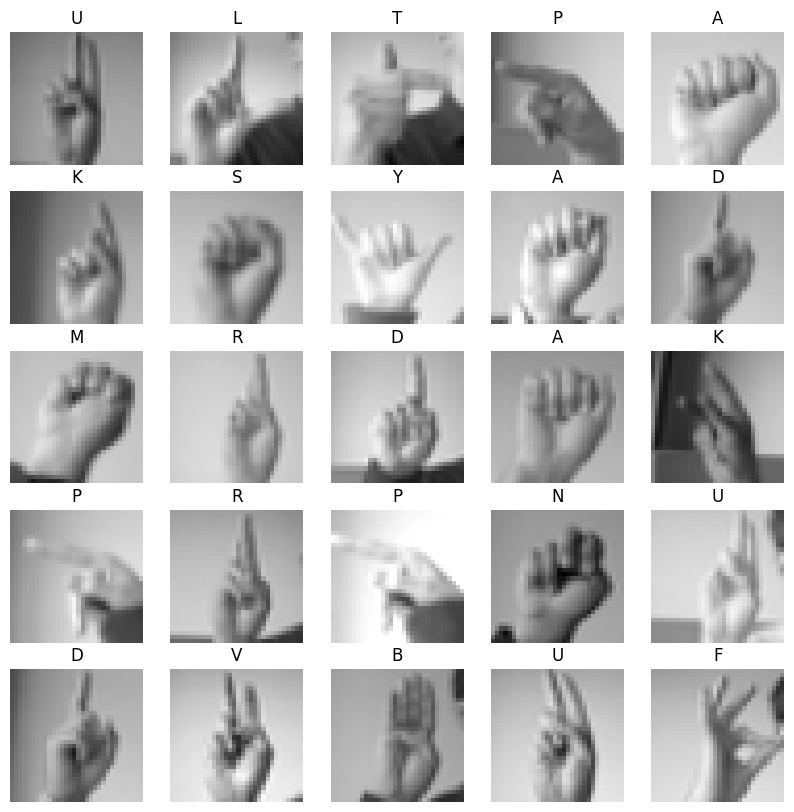

In [60]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [62]:

resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=24,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(24, activation='softmax'))

In [63]:
resnet_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [64]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
epochs=1
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

866/866 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.9697 - loss: 0.1033 - val_accuracy: 0.9778 - val_loss: 0.0672


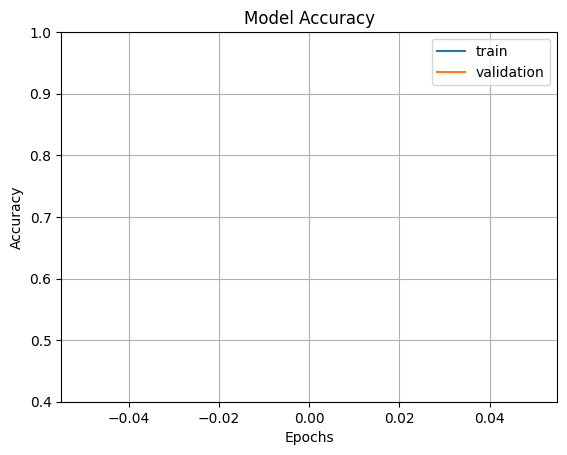

In [67]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

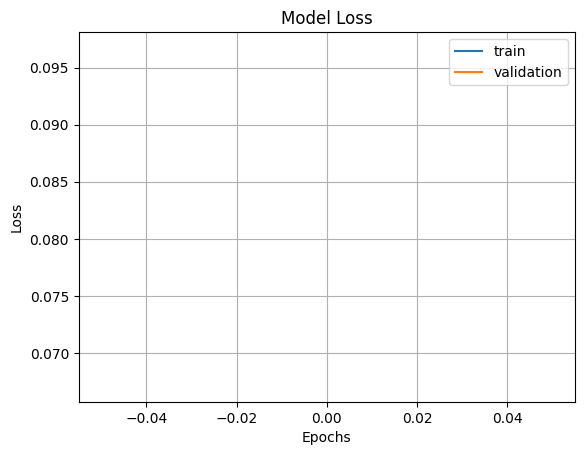

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

MAKE PREDICTIONS

In [78]:
from pathlib import Path
sign = list(Path(dataset_path).glob('V/*'))
PIL.Image.open(str(sign[4]))

/Users/shobhitsingh/Desktop/ML2/FinalProject/Sign_Language_Interpreter_CNN/image_dataset/V/12091.png


In [79]:
import cv2
image=cv2.imread(str(sign[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 32, 32, 3)


In [80]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
[[2.65347216e-10 3.91910106e-07 3.05028953e-11 4.79301025e-06
  1.72107731e-10 3.85930887e-09 8.76506476e-07 2.14151015e-07
  4.56041307e-04 2.52694372e-06 3.86423153e-06 1.66939929e-09
  7.09468736e-07 2.81713319e-10 2.24215387e-06 5.90881477e-08
  1.01425707e-04 1.27679616e-12 1.40379407e-05 1.85063021e-04
  9.99125063e-01 1.02604055e-04 7.70437296e-08 2.49458747e-08]]


In [81]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is V
